In [483]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

#data = pd.read_csv("/Users/rodicaceslov/Desktop/GradSchool/AdvancedDataAnalysisMethods/Homework/GeneralAviationUSLL.csv")

In [484]:
#Load the data
aviation = pd.read_csv('GeneralAviationUSLL.csv',encoding='latin1')

In [485]:
#Explore the data
aviation = pd.read_csv('GeneralAviationUSLL.csv',encoding='latin1')
print(aviation.head())

         Event.Id Investigation.Type Accident.Number Event.Date  \
0  20001213X30414           Accident      DCA87MA022     3/4/87   
1  20191130X65423           Accident      CEN20FA022   11/30/19   
2  20001213X24878           Accident      DCA88MA017    1/19/88   
3  20001214X35670           Accident      DCA85AA012     2/4/85   
4  20001212X18578           Accident      DCA92MA011   12/11/91   

          Location        Country   Latitude   Longitude Airport.Code  \
0      ROMULUS, MI  United States  42.222261  -83.396599          DTW   
1  Chamberlain, SD  United States  43.810828  -99.330656          9V9   
2     BAYFIELD, CO  United States  37.225559 -107.598112          DRO   
3     SOLDOTNA, AK  United States  60.487778 -151.058333          SXQ   
4         ROME, GA  United States  34.257038  -85.164673          RMG   

       Airport.Name  ...    Purpose.of.Flight  \
0     DETROIT METRO  ...              Unknown   
1  Chamberlain Muni  ...             Personal   
2          

In [486]:
aviation.describe()

,Latitude,Longitude,Lethality,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,74356.000000,74354.000000,74411.000000,72965.000000,50776.000000,48651.000000,50197.000000,62487.000000
mean,39.288434,-99.657302,0.195334,1.113575,0.514515,0.275205,0.410124,1.319010
std,8.238387,23.687360,0.396460,0.368051,1.011576,0.634666,0.931768,1.323869
min,-31.916838,-171.741111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.956215,-115.675995,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.750949,-95.268637,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.606409,-83.014653,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,77.007222,174.124167,1.000000,8.000000,9.000000,9.000000,88.000000,10.000000


In [487]:
#Split into train and test set
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [488]:
#train_set, test_set = split_train_test(aviation, 0.2)
#print(len(train_set), "train +", len(test_set), "test")

In [489]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(aviation, test_size=0.2, random_state=42)

In [490]:
#Explore the train set
train_set["Broad.Phase.of.Flight"].value_counts()

LANDING        15747
TAKEOFF        12210
CRUISE          8267
MANEUVERING     7234
APPROACH        6095
CLIMB           1708
DESCENT         1661
TAXI            1648
GO-AROUND       1330
STANDING         771
UNKNOWN          471
OTHER            113
Name: Broad.Phase.of.Flight, dtype: int64

In [491]:
train_set["Weather.Condition"].value_counts()

VMC    54664
IMC     4200
UNK      442
Name: Weather.Condition, dtype: int64

In [492]:
train_set["Injury.Severity"].value_counts()

Non-Fatal      46945
Fatal          11620
Incident         962
Unavailable       42
Name: Injury.Severity, dtype: int64

In [493]:
train_set["Aircraft.Damage"].value_counts()

Substantial    45318
Destroyed      12514
Minor           1062
Name: Aircraft.Damage, dtype: int64

In [494]:
train_set["Engine.Type"].value_counts().head(7)

Reciprocating    53975
Turbo Prop        2174
Turbo Shaft       1005
Unknown            968
Turbo Fan          549
Turbo Jet          291
REC, TJ, TJ          3
Name: Engine.Type, dtype: int64

In [495]:
train_set["Make"].str.upper().value_counts().head(10)

CESSNA      20792
PIPER       11421
BEECH        3999
MOONEY       1045
GRUMMAN       929
BELLANCA      811
HUGHES        523
AERONCA       504
ROBINSON      500
MAULE         462
Name: Make, dtype: int64

In [496]:
train_set["Model"].str.upper().value_counts().head(10)

152          1850
172          1265
172N          907
PA-28-140     749
150           656
172M          629
172P          539
150M          487
180           480
PA-18         473
Name: Model, dtype: int64

In [497]:
train_set["Lethality"].value_counts()

0.0    47907
1.0    11620
Name: Lethality, dtype: int64

In [498]:
train_set["Total.Fatal.Injuries"].value_counts()

0.0    28954
1.0     6075
2.0     3521
3.0     1013
4.0      666
5.0      180
6.0      109
7.0       37
8.0       25
9.0       10
Name: Total.Fatal.Injuries, dtype: int64

In [499]:
train_set["Purpose.of.Flight"].value_counts()

Personal                     37639
Instructional                 7559
Unknown                       3218
Aerial Application            3075
Business                      2876
Positioning                   1006
Other Work Use                 683
Ferry                          564
Aerial Observation             416
Public Aircraft                401
Executive/Corporate            363
Flight Test                    258
Skydiving                      126
Air Race/Show                  100
Banner Tow                      90
Public Aircraft - Federal       56
Glider Tow                      32
Public Aircraft - State         31
Public Aircraft - Local         13
External Load                   12
Firefighting                    10
Air Drop                         4
Name: Purpose.of.Flight, dtype: int64

In [500]:
train_set["Injury.Severity"].value_counts()

Non-Fatal      46945
Fatal          11620
Incident         962
Unavailable       42
Name: Injury.Severity, dtype: int64

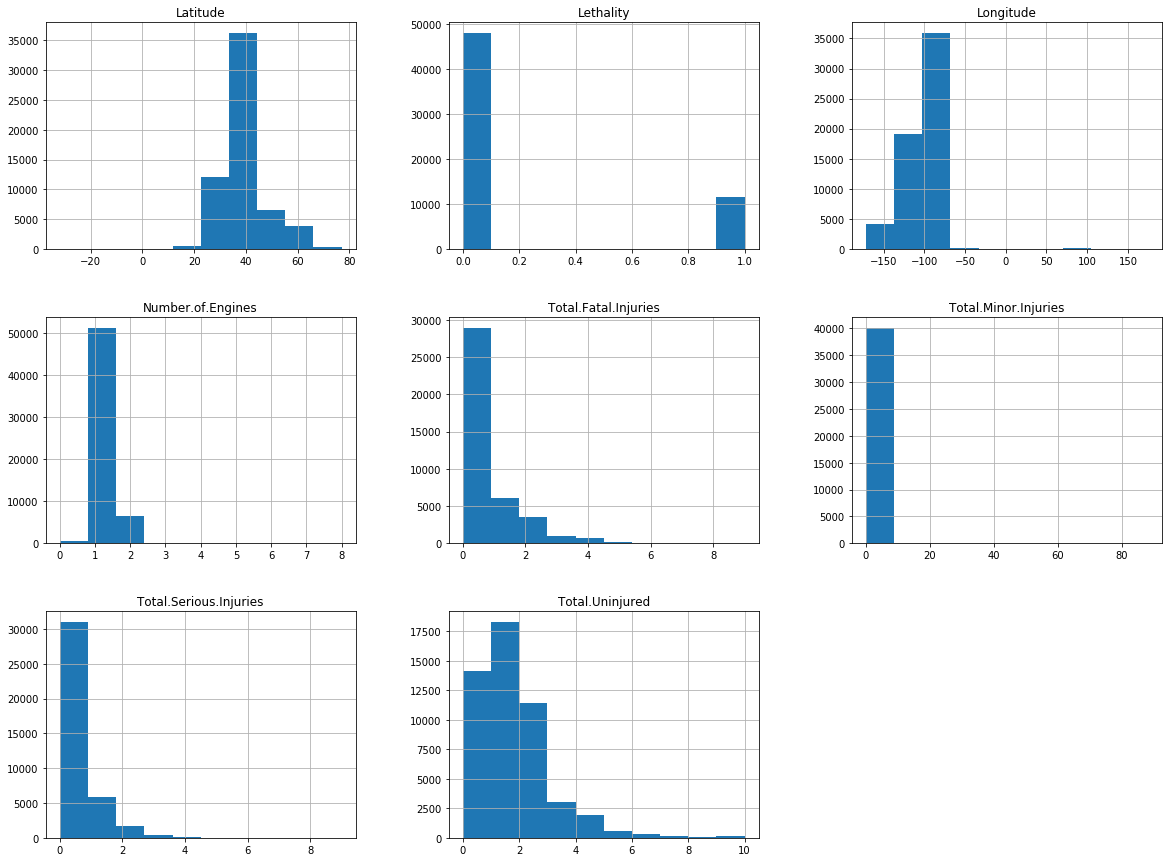

In [501]:
#Visualize the train set
%matplotlib inline 
import matplotlib.pyplot as plt 
train_set.hist(bins=10, figsize=(20,15))
plt.show()

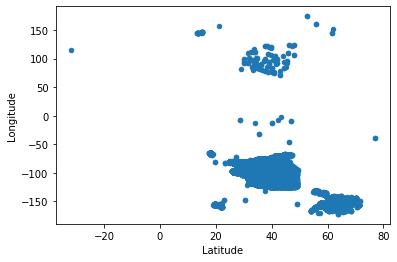

In [502]:
train_set.plot(kind="scatter", x="Latitude", y="Longitude")


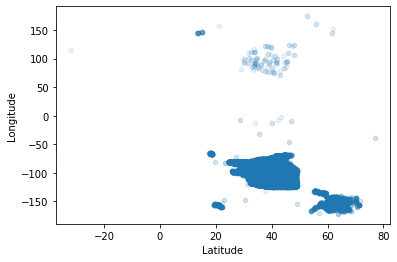

In [503]:
train_set.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.1)

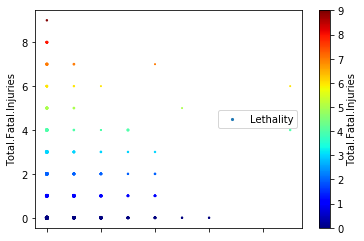

In [504]:
train_set.plot(kind="scatter", x="Total.Serious.Injuries", y="Total.Fatal.Injuries",
         s=aviation_injuries["Total.Fatal.Injuries"], label="Lethality",
         c="Total.Fatal.Injuries", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a41a70ac8>,
      dtype=object)

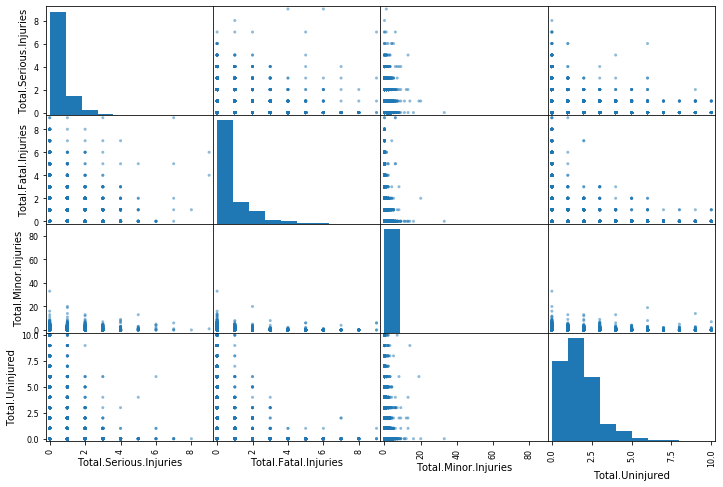

In [505]:
from pandas.plotting import scatter_matrix

attributes = ["Total.Serious.Injuries", "Total.Fatal.Injuries", "Total.Minor.Injuries",
              "Total.Uninjured"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

In [506]:
train_set.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
50932,20010821X01747,Accident,FTW01LA187,8/20/01,"Sugarland, TX",United States,29.598443,-95.622552,SGR,Sugarland Municipal/Hull Field,...,Personal,NaN,NaN,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,25/07/2002
12258,20021226X05636,Accident,MIA03FA034,12/25/02,"Manteo, NC",United States,35.908226,-75.675730,NaN,NaN,...,Positioning,NaN,1.0,NaN,NaN,NaN,IMC,APPROACH,Probable Cause,25/04/2014
8880,20001214X41641,Accident,MKC85FA030,11/30/84,"COLBY, KS",United States,39.395837,-101.052377,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,DESCENT,Probable Cause,NaN
28866,20010110X00272,Accident,SEA86LA048,1/24/86,"WENATCHEE, WA",United States,47.423460,-120.310349,38WA,FANCHER,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,LANDING,Probable Cause,NaN
65434,20100515X63412,Accident,WPR10LA242,5/14/10,"Monument, OR",United States,44.831945,-119.430278,12S,Monument Municipal,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Probable Cause,22/07/2010


In [507]:
test_set.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
7168,20071221X01984,Accident,NYC08FA041,11/21/07,"New Windsor, NY",United States,41.491389,-74.168889,SWF,Stewart International,...,Personal,NaN,1.0,2.0,NaN,NaN,IMC,APPROACH,Probable Cause,11/6/09
64723,20090803X52257,Accident,CEN09CA485,7/31/09,"Flushing, MI",United States,43.063083,-83.851073,3DA,Dalton Airport,...,Instructional,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Probable Cause,20/10/2009
50675,20001228X45497,Accident,MIA01LA047,12/22/00,"AUBURNDALE, FL",United States,28.065297,-81.788691,NaN,EAGLES NEST,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,TAKEOFF,Probable Cause,19/04/2001
2212,20040108X00032,Accident,LAX04FA076,12/23/03,"Redwood Valley, CA",United States,39.287500,-123.277500,NaN,NaN,...,Positioning,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,26/01/2006
23000,20001214X42979,Accident,FTW83LA214,5/1/83,"KRUM, TX",United States,33.261507,-97.238073,NaN,NaN,...,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,GO-AROUND,Probable Cause,NaN


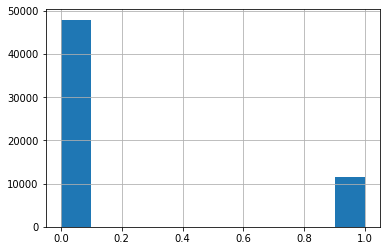

In [508]:
#Visualize newly created column "Lethality" in train set. Note: 1 indicates Fatal and 0 indicates Non-Fatal.
train_set["Lethality"].hist()

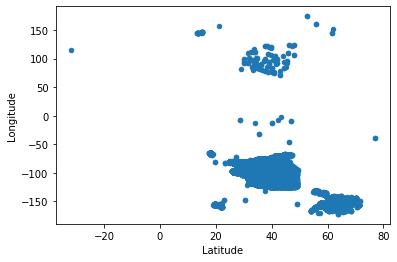

In [509]:
train_set.plot(kind="scatter", x="Latitude", y="Longitude")

In [531]:
#Apply transformations
try:
    from sklearn.impute import SimpleImputer 
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
    
#Replace NaN values with most frequent
imputer = SimpleImputer(strategy="most_frequent")

In [532]:
aviation_num = aviation.drop('Event.Id', axis=1)

In [527]:
imputer.fit(aviation_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [528]:
X = imputer.transform(aviation_num)

In [529]:
imputer.statistics_

array(['Accident', 'ANC01LA060', '6/16/01', 'ANCHORAGE, AK',
       'United States', 61.2180556, -149.90027780000003, 'NONE',
       'Private', 0.0, 'Non-Fatal', 'Substantial', 'Airplane', 'NONE',
       'CESSNA', '152', 'No', 1.0, 'Reciprocating',
       'Part 91: General Aviation', 'UNK', 'Personal', '(DBA: PENAIR)',
       0.0, 0.0, 0.0, 1.0, 'VMC', 'LANDING', 'Probable Cause',
       '31/03/1993'], dtype=object)

In [534]:
# Remove columns
df = pd.DataFrame(train_set)
   
df.drop(["Total.Fatal.Injuries",'Total.Serious.Injuries', "Total.Minor.Injuries","Total.Uninjured", "Registration.Number","Accident.Number","Amateur.Built","Air.Carrier","Schedule","Publication.Date","Event.Id","Report.Status"    ], axis =1) 

,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Lethality,Injury.Severity,Aircraft.Damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Weather.Condition,Broad.Phase.of.Flight
50932,Accident,8/20/01,"Sugarland, TX",United States,29.598443,-95.622552,SGR,Sugarland Municipal/Hull Field,0.0,Non-Fatal,Substantial,NaN,Bass,F33C,1.0,Reciprocating,NaN,Personal,VMC,APPROACH
12258,Accident,12/25/02,"Manteo, NC",United States,35.908226,-75.675730,NaN,NaN,1.0,Fatal,Substantial,Airplane,Cessna,208B,1.0,Turbo Prop,Part 91: General Aviation,Positioning,IMC,APPROACH
8880,Accident,11/30/84,"COLBY, KS",United States,39.395837,-101.052377,NaN,NaN,1.0,Fatal,Destroyed,NaN,CESSNA,150,1.0,Reciprocating,NaN,Personal,VMC,DESCENT
28866,Accident,1/24/86,"WENATCHEE, WA",United States,47.423460,-120.310349,38WA,FANCHER,0.0,Non-Fatal,Substantial,NaN,CESSNA,206,1.0,Reciprocating,NaN,Personal,VMC,LANDING
65434,Accident,5/14/10,"Monument, OR",United States,44.831945,-119.430278,12S,Monument Municipal,0.0,Non-Fatal,Substantial,Airplane,GRUMMAN,AA-5A,1.0,Reciprocating,Part 91: General Aviation,Personal,VMC,LANDING
69686,Accident,7/31/14,"Oakdale, LA",United States,30.000000,92.000000,ACP,ALLEN PARISH,0.0,Non-Fatal,Substantial,Airplane,AVIAT AIRCRAFT INC,A-1C-180,1.0,Reciprocating,Part 91: General Aviation,Personal,VMC,LANDING
15766,Accident,3/9/96,"CLINTON, LA",United States,30.865736,-91.015659,NaN,NaN,0.0,Non-Fatal,Substantial,NaN,BEECH,V35A,1.0,Reciprocating,NaN,Personal,VMC,DESCENT
29869,Accident,7/27/86,"FARMINGDALE, NY",United States,40.732600,-73.445401,FRG,REPUBLIC,0.0,Non-Fatal,Substantial,NaN,BEECH,BE-20,2.0,Turbo Prop,NaN,Personal,VMC,TAKEOFF
39324,Accident,7/7/92,"OKEECHOBEE, FL",United States,27.243935,-80.829783,NaN,NaN,0.0,Non-Fatal,Substantial,NaN,MAULE,MX-7-180,1.0,Reciprocating,NaN,Personal,VMC,CRUISE
28315,Accident,9/8/85,"RAINEY PASS, AK",United States,62.090456,-152.731663,NaN,TUNDRA STRIP,0.0,Non-Fatal,Substantial,NaN,TALBOTT,BL-65,1.0,Reciprocating,NaN,Personal,VMC,TAKEOFF
